##### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

##### Load the dataset

In [16]:
df = pd.read_csv("/Users/yaminiane/Documents/Projects/ML/Customer_endtoend/Data/segmentation.csv")

In [17]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


##### Understanding the data

In [18]:
df.shape

(1000, 10)

In [19]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [21]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

##### Data Cleaning

Converting the currency from DEM to USD

In [22]:
df['Credit amount']= df['Credit amount']*0.55357436

Converting 'Job' and 'Duration' into categorical columns

Checking for null values

In [23]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [24]:
df.dtypes

Age                   int64
Sex                  object
Job                   int64
Housing              object
Saving accounts      object
Checking account     object
Credit amount       float64
Duration              int64
Purpose              object
dtype: object

In [25]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [26]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

It is not always required to have a bank account to secure a loan from the bank. The missing account details here may be attributed to such cases. Hence, treating the missing values here as a separate category is the most appropriate solution.

In [27]:
df['Saving accounts'].fillna('No Account', inplace = True)

In [28]:
df['Checking account'].fillna('No Account', inplace = True)

In [29]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [30]:
df['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [31]:
df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [32]:
df['Duration'].value_counts()

Duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [33]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

##### Outlier Detection and Removal

<Axes: >

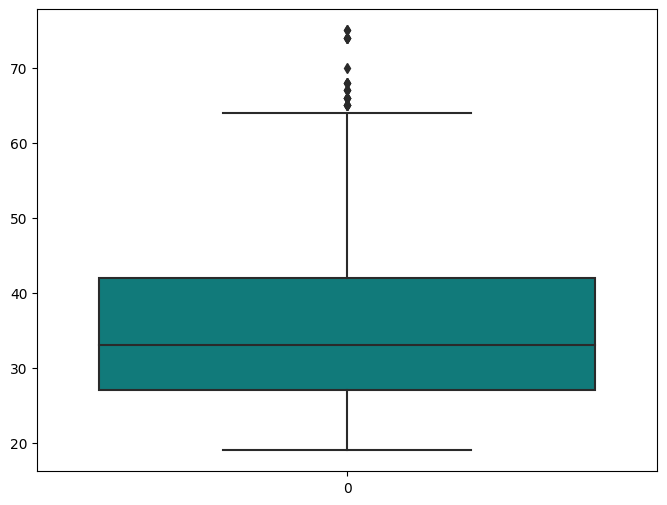

In [34]:
colors = ['darkcyan','maroon']
plt.figure(figsize = (8,6))
sns.boxplot(df['Age'], palette=colors)

It is observed that 50% of the customers are aged above 25 and less than 50.

<Axes: >

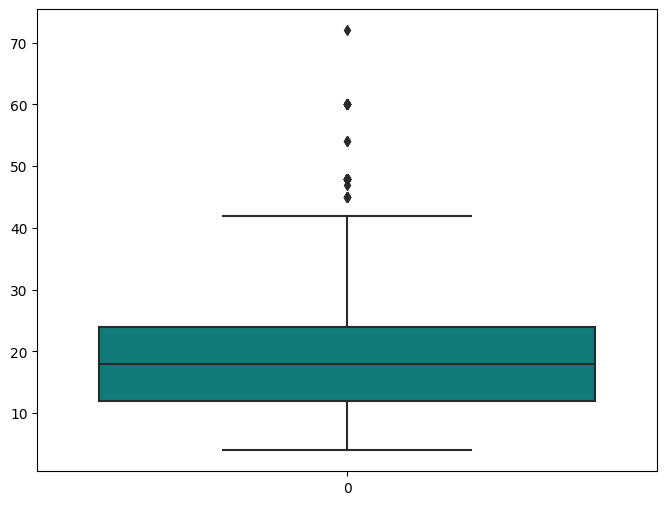

In [35]:
plt.figure(figsize = (8,6))
sns.boxplot(df['Duration'], palette=colors)

In [36]:
df['Duration'].mean()

20.903

In [37]:
df[df['Duration'] >20].shape[0]

446

In [38]:
df[df['Duration'] < 20].shape[0]

546

In [39]:
df[(df['Duration'] > 10) & (df['Duration'] < 25)].shape[0]

599

From the above boxplot, loans from the bank are taken for a average duration of 10 to 25 months.

<Axes: xlabel='Job', ylabel='Density'>

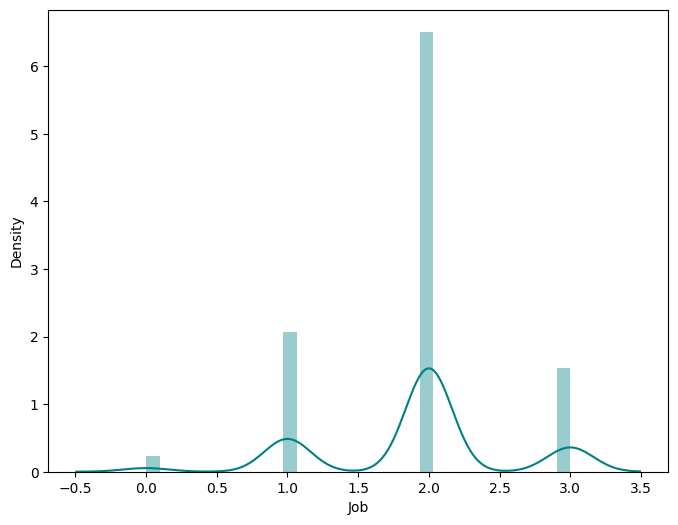

In [40]:
plt.figure(figsize = (8,6))
sns.distplot(df["Job"], color = '#008080')

<Axes: xlabel='Age', ylabel='Density'>

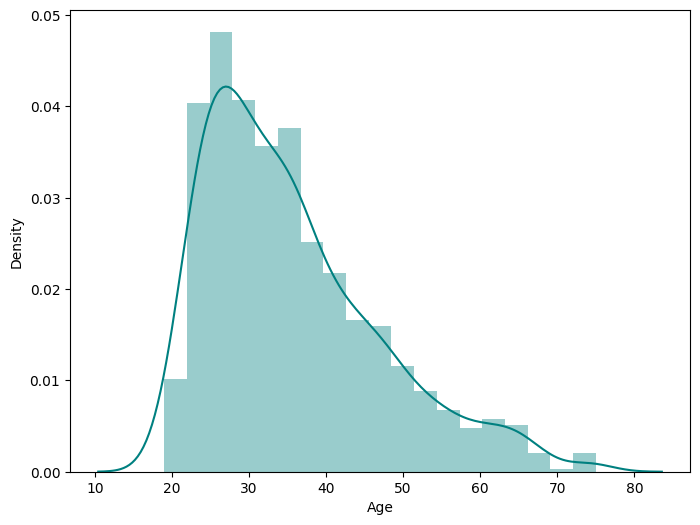

In [41]:
plt.figure(figsize = (8,6))
sns.distplot(df["Age"], color = '#008080')

<Axes: xlabel='Age', ylabel='Density'>

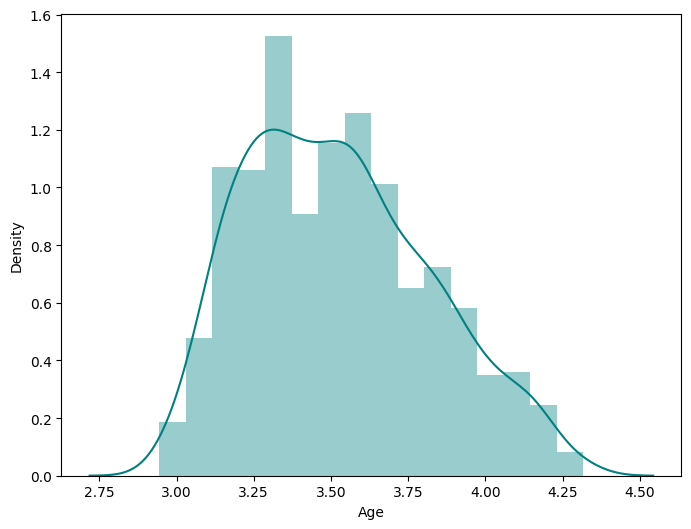

In [42]:
plt.figure(figsize = (8,6))
sns.distplot(np.log(df["Age"]), color = '#008080')

<Axes: xlabel='Credit amount', ylabel='Density'>

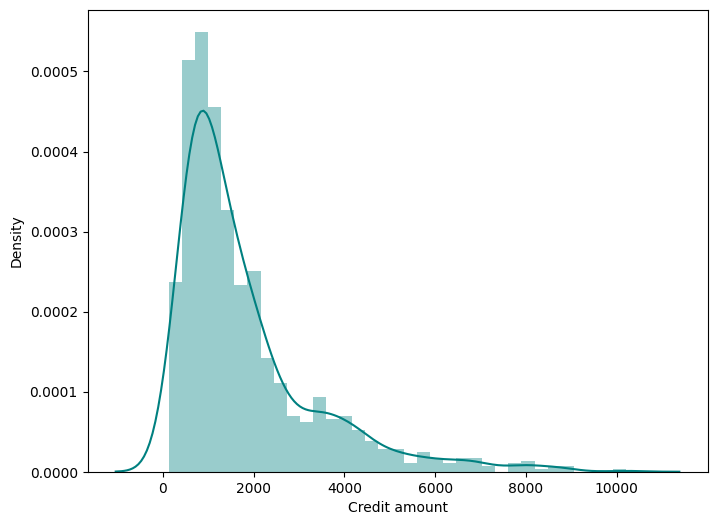

In [43]:
plt.figure(figsize = (8,6))
sns.distplot(df["Credit amount"], color = '#008080')

<Axes: xlabel='Credit amount', ylabel='Density'>

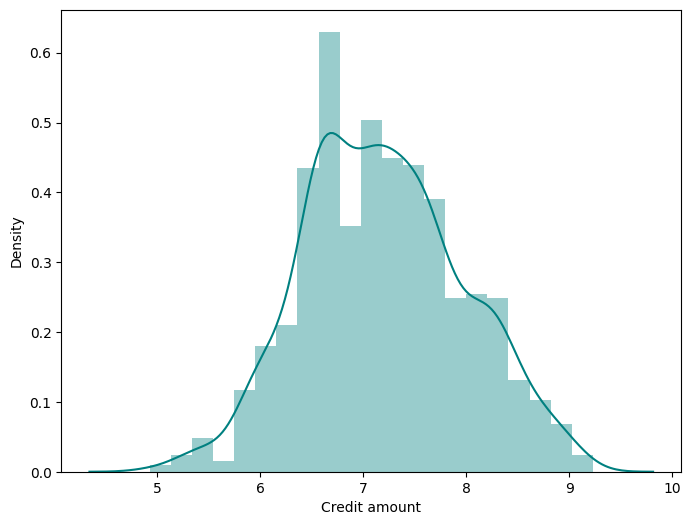

In [44]:
plt.figure(figsize = (8,6))
sns.distplot(np.log(df["Credit amount"]), color = '#008080')

<Axes: xlabel='Duration', ylabel='Density'>

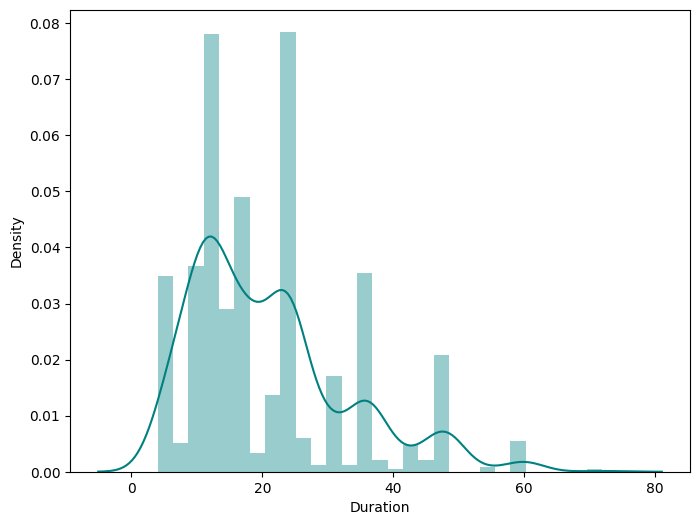

In [45]:
plt.figure(figsize = (8,6))
sns.distplot(df["Duration"], color = '#008080')

<Axes: xlabel='Purpose', ylabel='count'>

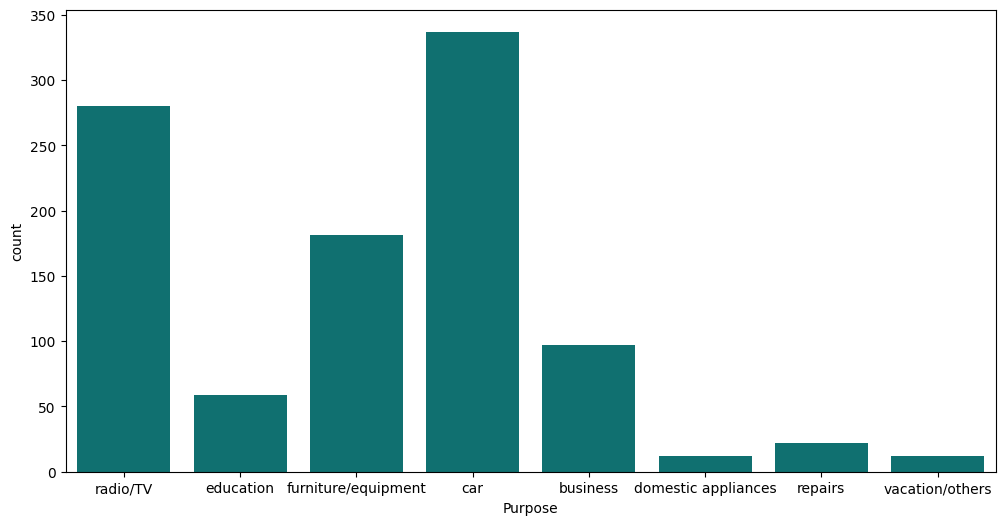

In [46]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Purpose"], color = '#008080')

It is seen that most of the customer take a credit loan for their housing purposes such as buying a car, radio/TV or for furniture and equipment.

<Axes: xlabel='Sex', ylabel='count'>

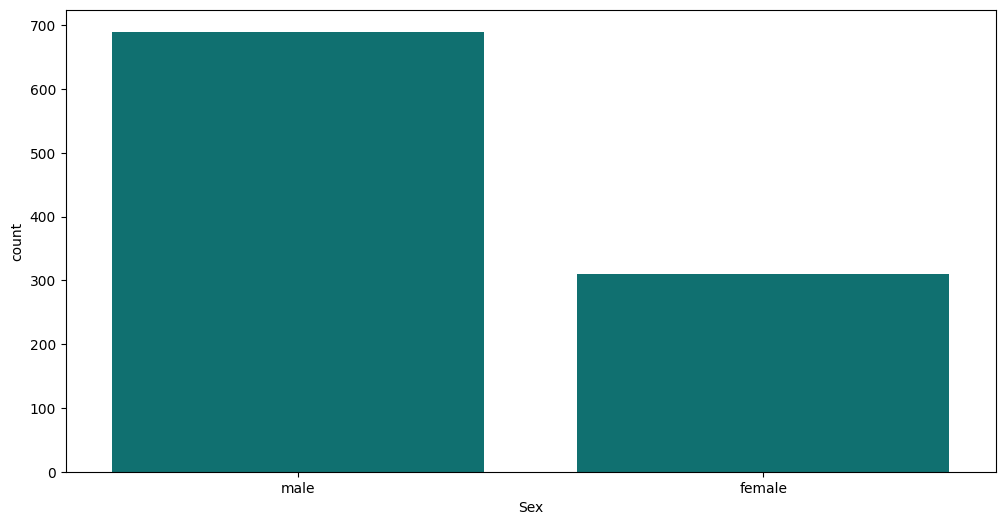

In [47]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Sex"], color = '#008080')

Analyzing the credit taken by gender, men tend to take more loans from the bank than female.

<Axes: xlabel='Housing', ylabel='count'>

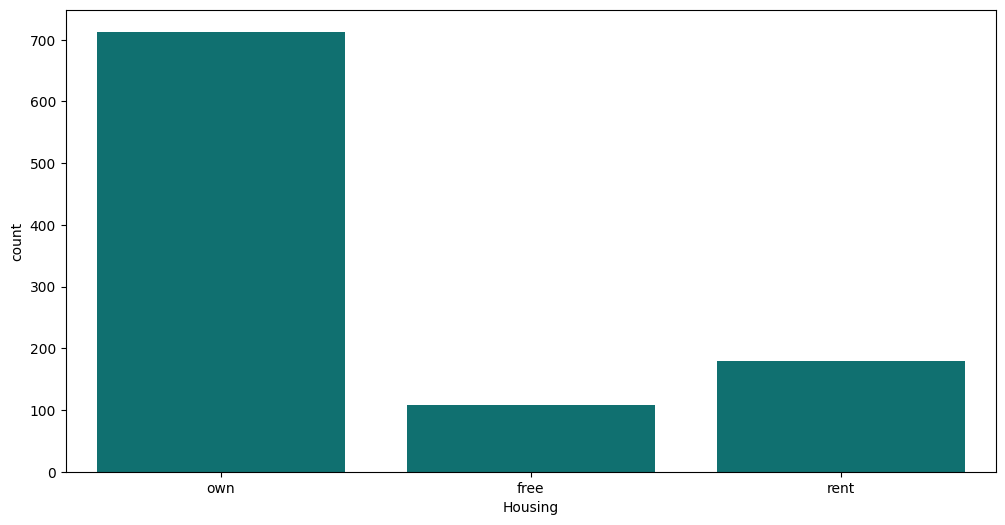

In [48]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Housing"], color = '#008080')

In [49]:
print(len(df[df['Housing'] == 'own']))

713


In [50]:
print(len(df[df['Housing'] == 'free']))

108


In [51]:
print(len(df[df['Housing'] == 'rent']))

179


Among the customers who take a credit loan from the bank, 71% of them own a house. <br>
This can be justified by the earlier observation that people generally take loans for their housing purposes

<Axes: xlabel='Saving accounts', ylabel='count'>

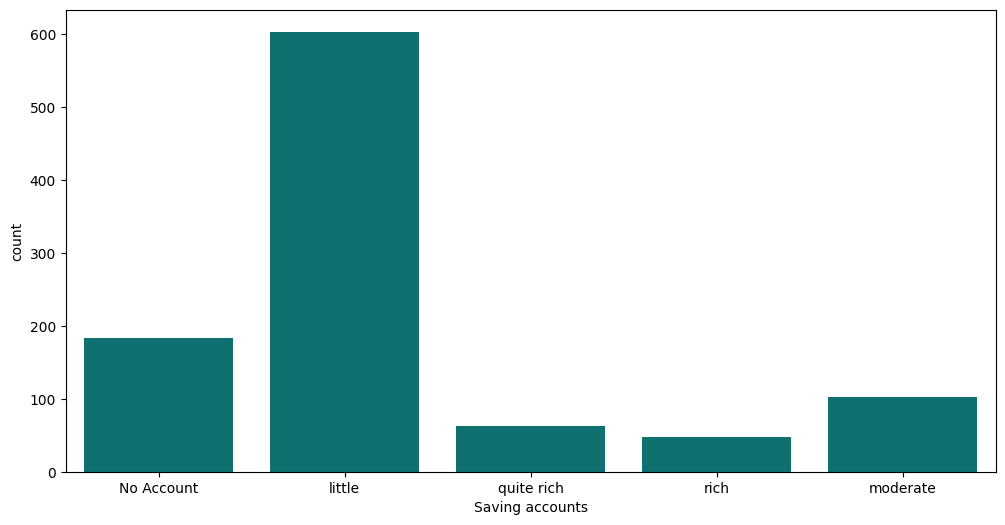

In [52]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Saving accounts"], color = '#008080')

In [53]:
print(df['Saving accounts'].value_counts())

Saving accounts
little        603
No Account    183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


60% of the customers have little savings in their saving accounts . There are very only 10% of the customers who own a bank account with the bank.

<Axes: xlabel='Checking account', ylabel='count'>

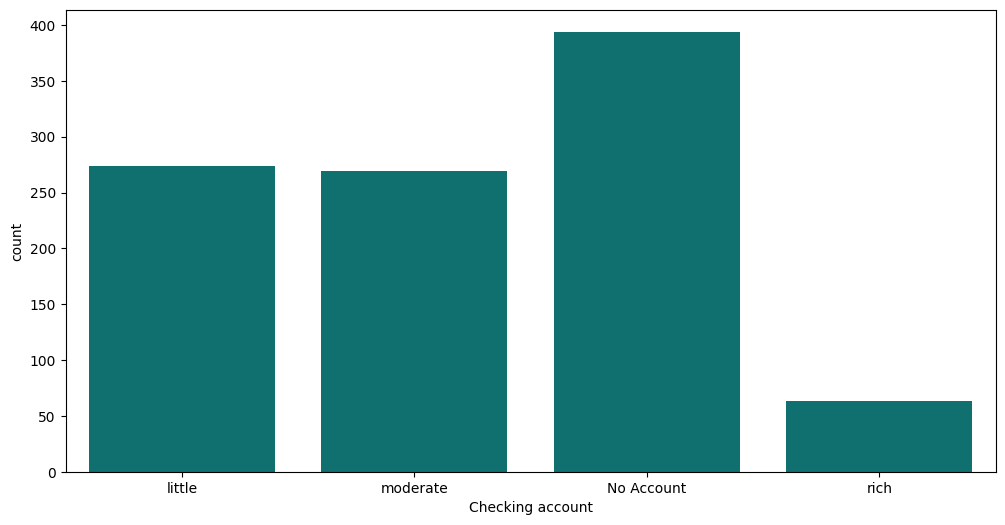

In [54]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Checking account"], color = '#008080')

<Axes: xlabel='Job', ylabel='count'>

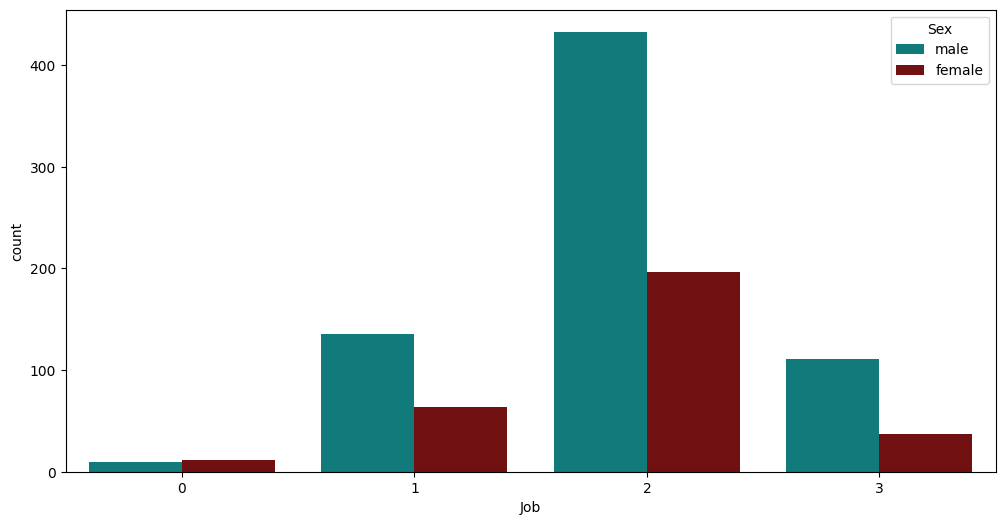

In [55]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Job"], hue=df['Sex'], palette = colors)

Most credit taking customers have 2 jobs. This is more evident in men than in females.

<Axes: xlabel='Saving accounts', ylabel='count'>

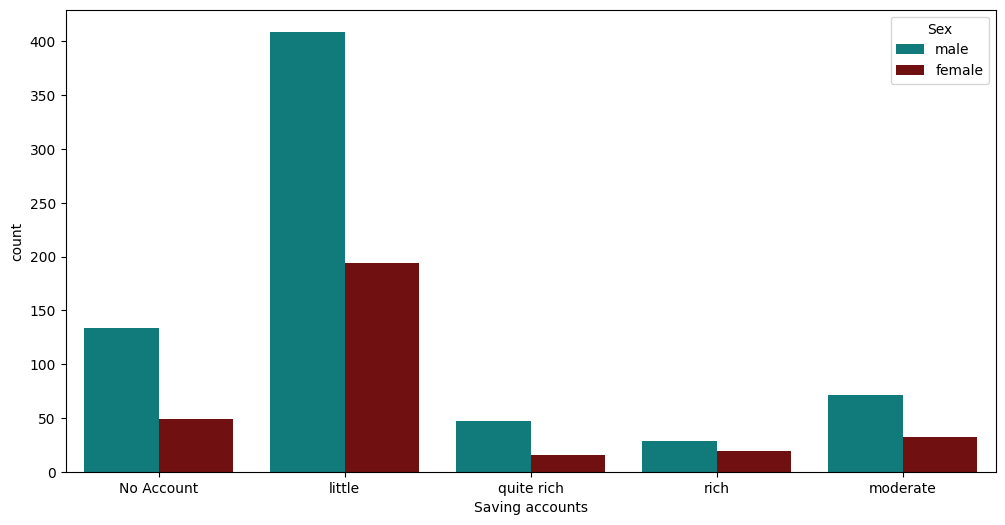

In [56]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Saving accounts"], hue=df['Sex'], palette = colors)

<Axes: xlabel='Checking account', ylabel='count'>

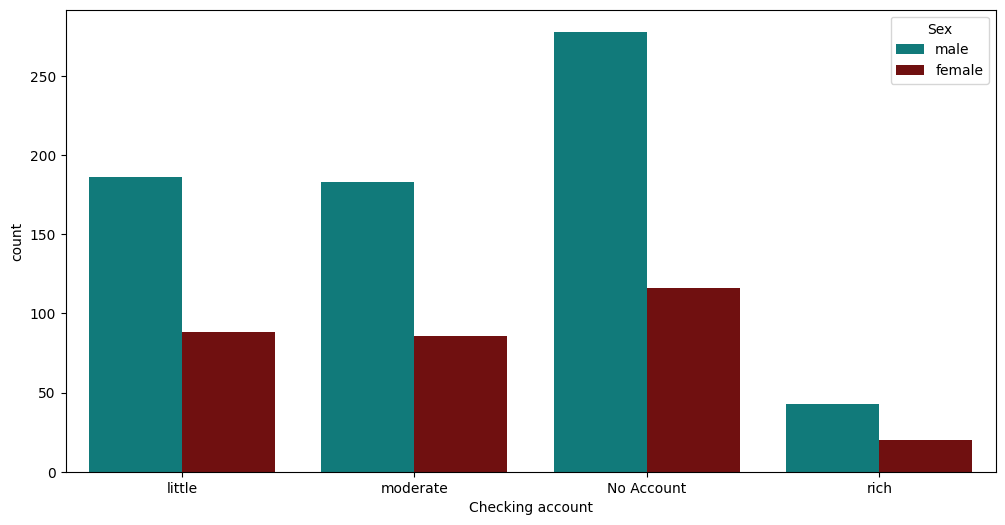

In [57]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Checking account"], hue=df['Sex'], palette = colors)

<Axes: xlabel='Purpose', ylabel='count'>

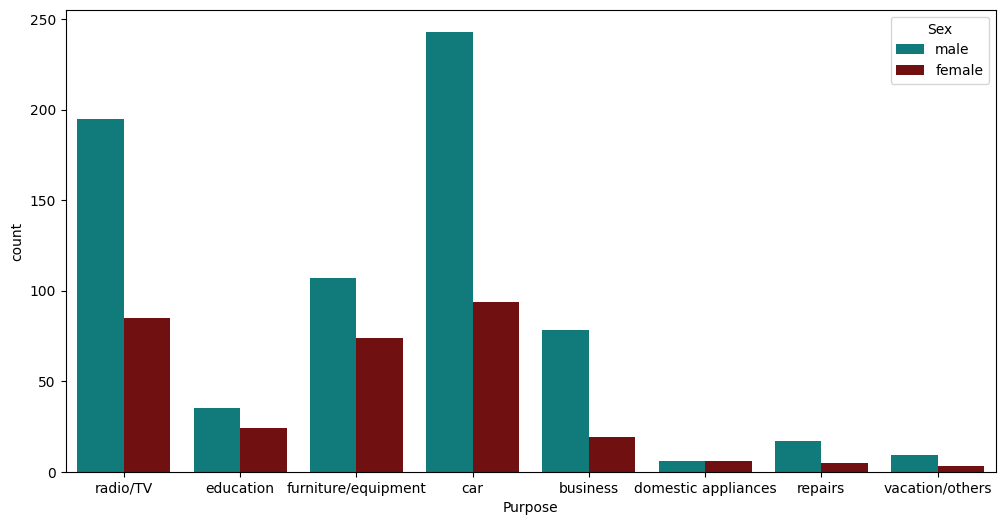

In [58]:
plt.figure(figsize = (12,6))
sns.countplot(x=df["Purpose"], hue=df['Sex'], palette = colors)

In [59]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    1593.062007
male      1908.746857
Name: Credit amount, dtype: float64

In [60]:
df.groupby('Sex')['Age'].mean()

Sex
female    32.803226
male      36.778261
Name: Age, dtype: float64

In [61]:
df.groupby('Sex')['Duration'].mean()

Sex
female    19.43871
male      21.56087
Name: Duration, dtype: float64

It is observed that the average time taken in months to pay back a loan is less for females than men.

In [62]:
df.groupby('Purpose')['Credit amount'].mean()

Purpose
business               2301.785017
car                    2085.974961
domestic appliances     829.254391
education              1593.853174
furniture/equipment    1697.806445
radio/TV               1377.101234
repairs                1510.201179
vacation/others        4544.476446
Name: Credit amount, dtype: float64

In [63]:
print(df[df['Purpose'] == 'vacation/others']['Sex'].value_counts())

Sex
male      9
female    3
Name: count, dtype: int64


In [64]:
print(df[df['Purpose'] == 'car']['Sex'].value_counts())

Sex
male      243
female     94
Name: count, dtype: int64


In [65]:
print(df[df['Purpose'] == 'business']['Sex'].value_counts())

Sex
male      78
female    19
Name: count, dtype: int64


In [66]:
print(df[df['Purpose'] == 'business']['Housing'].value_counts())

Housing
own     76
rent    16
free     5
Name: count, dtype: int64


In [67]:
print(df[df['Purpose'] == 'car']['Housing'].value_counts())

Housing
own     219
rent     63
free     55
Name: count, dtype: int64


In [68]:
df[df['Purpose'] == 'car']['Saving accounts'].value_counts()

Saving accounts
little        188
No Account     74
moderate       39
quite rich     18
rich           18
Name: count, dtype: int64

In [69]:
df[df['Purpose'] == 'business']['Saving accounts'].value_counts()

Saving accounts
little        56
moderate      17
No Account    14
rich           6
quite rich     4
Name: count, dtype: int64

In [70]:
df[df['Purpose'] == 'business']['Checking account'].value_counts()

Checking account
moderate      40
No Account    37
little        15
rich           5
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Credit amount'>

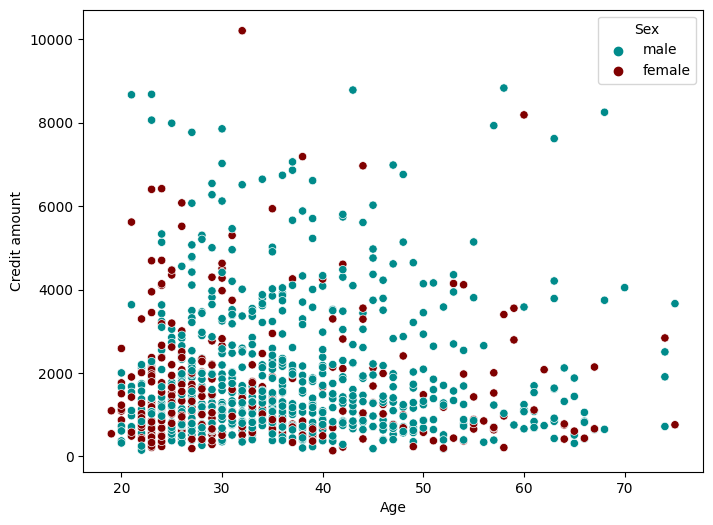

In [71]:
plt.figure(figsize = (8,6))
sns.scatterplot(x= df["Age"],y = df['Credit amount'], data=df, hue='Sex', palette=colors)

<Axes: xlabel='Duration', ylabel='Credit amount'>

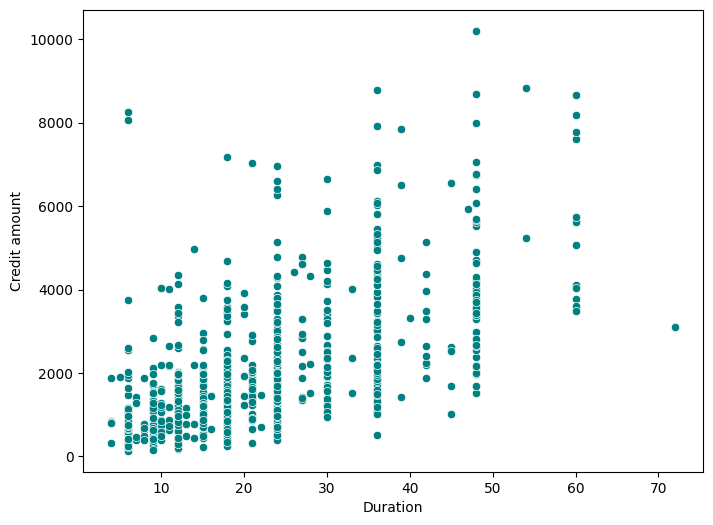

In [72]:
plt.figure(figsize = (8,6))
sns.scatterplot(x= df["Duration"],y = df['Credit amount'], data=df, color = '#008080')

<Axes: xlabel='Job', ylabel='Credit amount'>

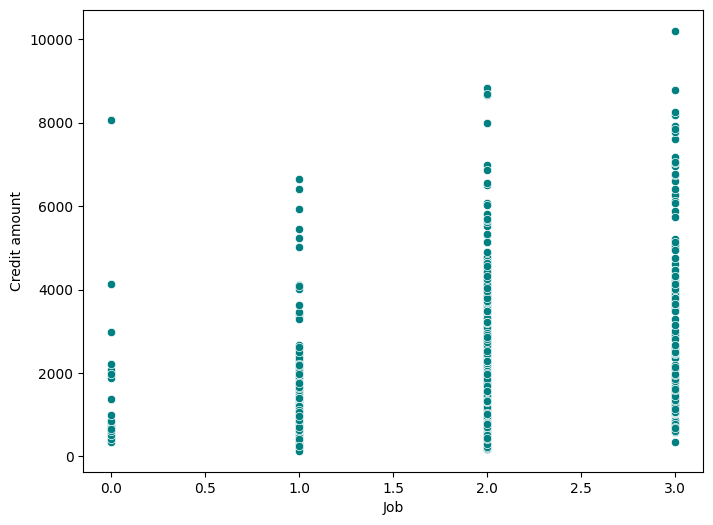

In [73]:
plt.figure(figsize = (8,6))
sns.scatterplot(x= df["Job"],y = df['Credit amount'], data=df, color = '#008080')

<Axes: xlabel='Purpose', ylabel='Credit amount'>

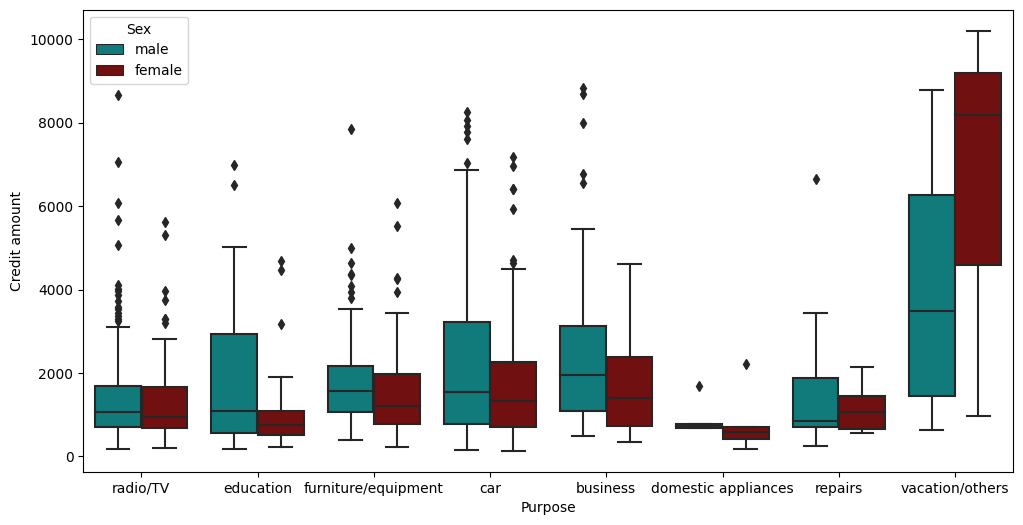

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Purpose',y='Credit amount', hue='Sex', data=df, palette = colors)

The highest credit amount taken is for the purpose of vacations.

<Axes: xlabel='Housing', ylabel='Credit amount'>

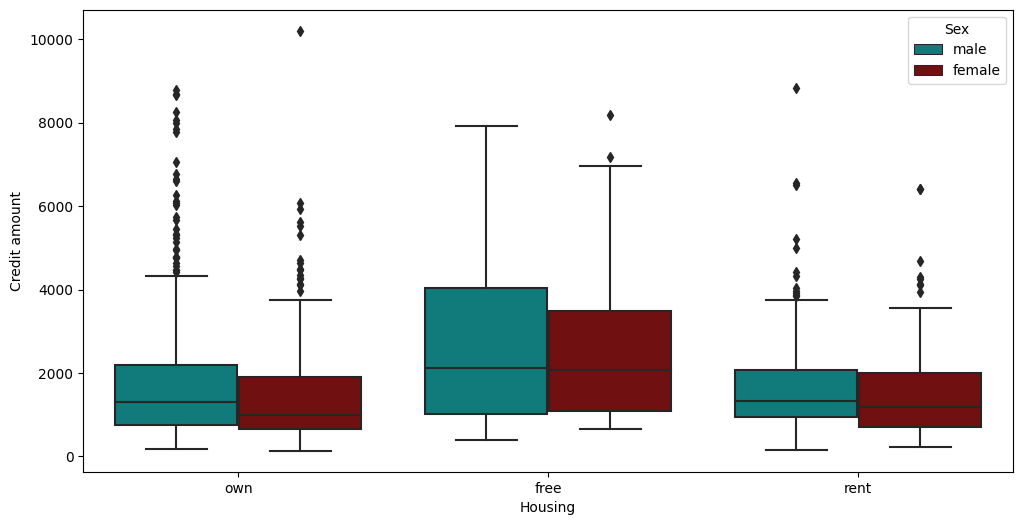

In [75]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Housing',y='Credit amount', hue='Sex', data=df, palette = colors)

<Axes: xlabel='Job', ylabel='Credit amount'>

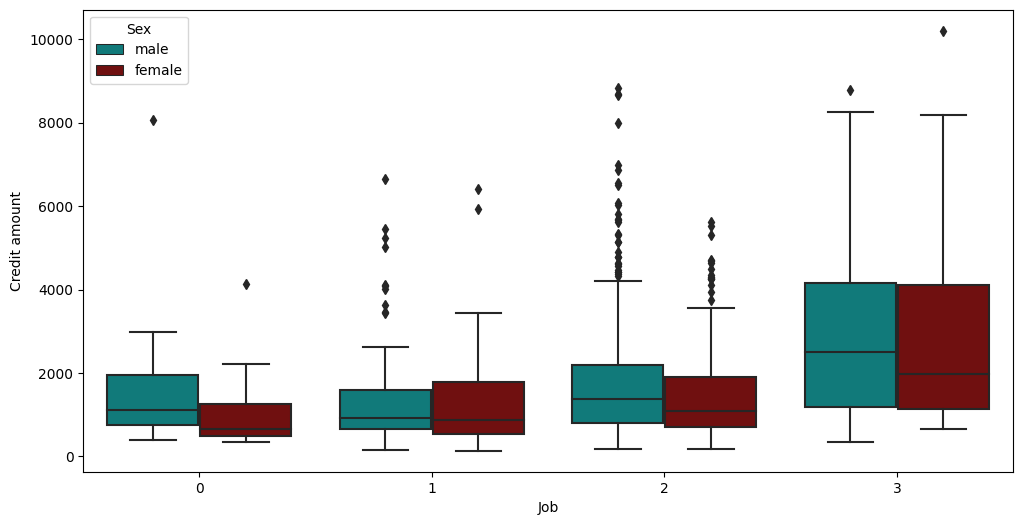

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Job',y='Credit amount', hue='Sex', data=df, palette = colors)

People with three jobs tend to take higher amounts of credit than those with no, one or two jobs.

<Axes: xlabel='Saving accounts', ylabel='Credit amount'>

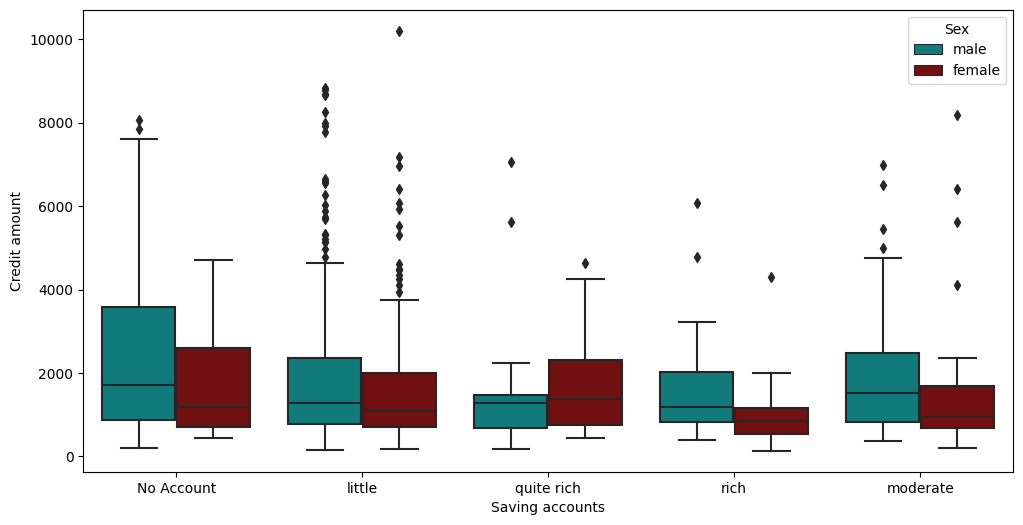

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Saving accounts',y='Credit amount', hue='Sex', data=df, palette = colors)

<Axes: xlabel='Checking account', ylabel='Credit amount'>

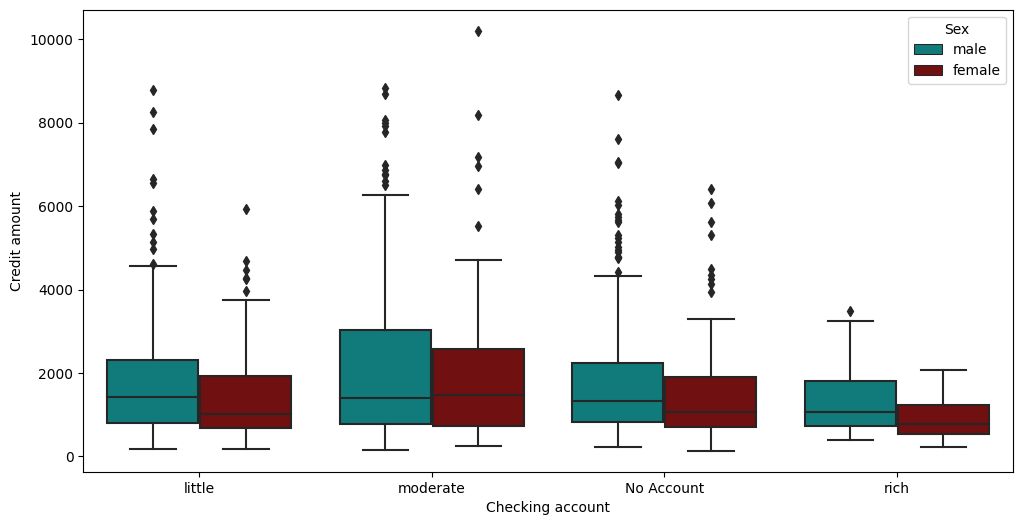

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Checking account',y='Credit amount', hue='Sex', data=df, palette = colors)

<Figure size 1200x600 with 0 Axes>

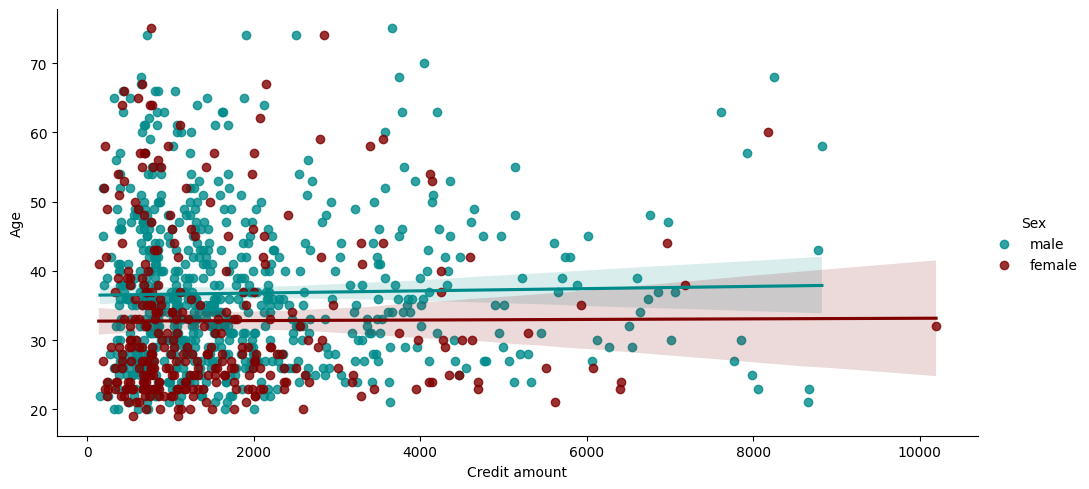

In [79]:
plt.figure(figsize=(12,6))
sns.lmplot(x="Credit amount",y="Age", hue="Sex", data=df, palette=colors, aspect=2)
plt.show()

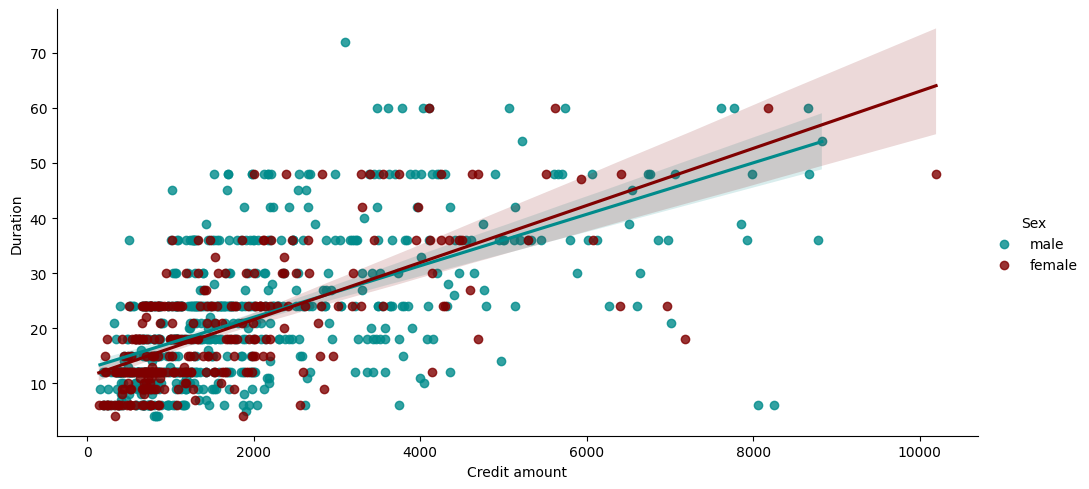

In [80]:
sns.lmplot(x="Credit amount",y='Duration', hue="Sex", data=df, palette=colors, aspect=2)
plt.show()

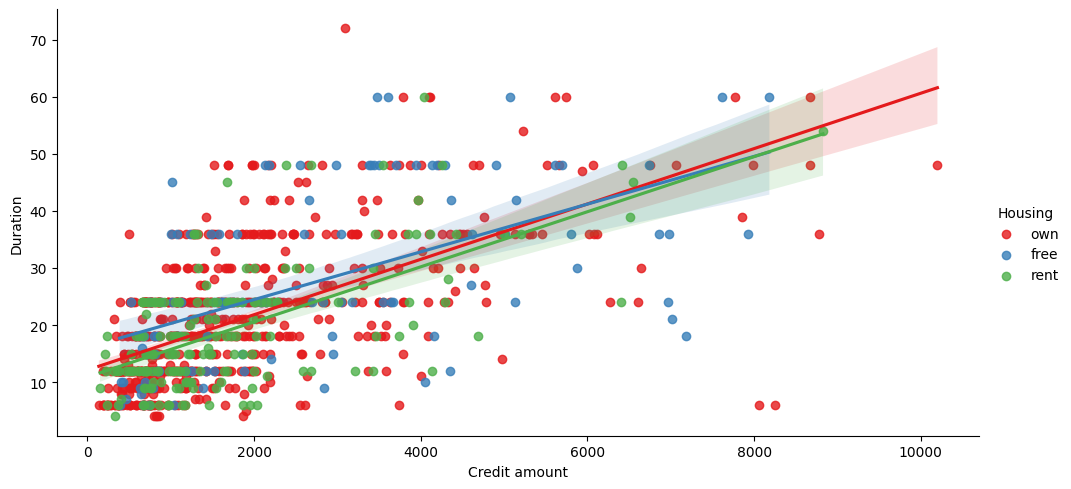

In [81]:
sns.lmplot(x="Credit amount",y='Duration', hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

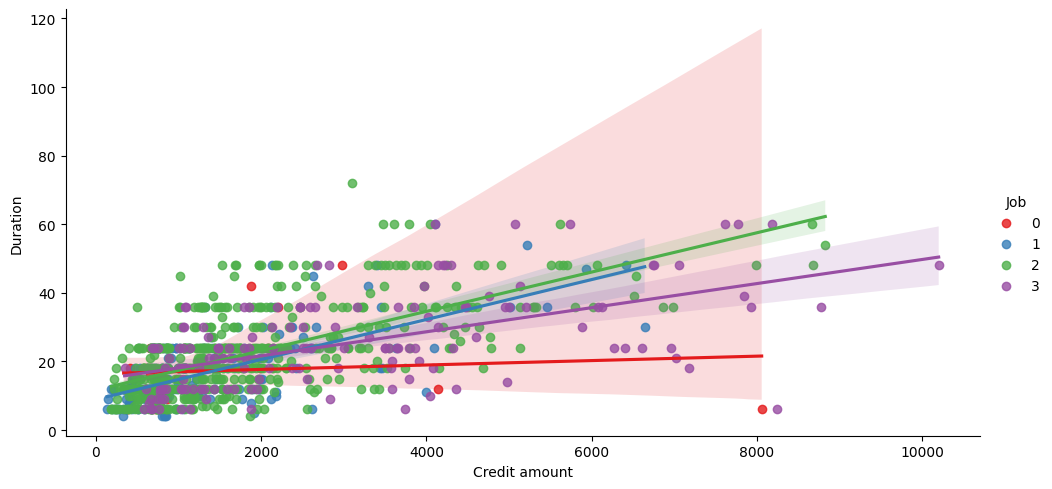

In [82]:
sns.lmplot(x="Credit amount",y='Duration', hue="Job", data=df, palette="Set1", aspect=2)
plt.show()

Converting 'Job' and 'Duration' into categorical columns

In [83]:
df['Job']= df['Job'].astype("object")

##### Feature Encoding

##### Clustering

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#selected_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 
#                    'Checking account', 'Credit amount', 'Duration', 'Purpose']

selected_columns = ['Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
segmentation_data = df[selected_columns].copy()
segmentation_data = pd.get_dummies(segmentation_data)

In [102]:
scaler = StandardScaler()
#segmentation_data[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(segmentation_data[['Age', 'Credit amount', 'Duration']])
segmentation_data[['Credit amount', 'Duration']] = scaler.fit_transform(segmentation_data[['Credit amount', 'Duration']])

In [103]:
inertia = []
clusters_range = range(1, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data)
    inertia.append(kmeans.inertia_)

Plot the elbow graph

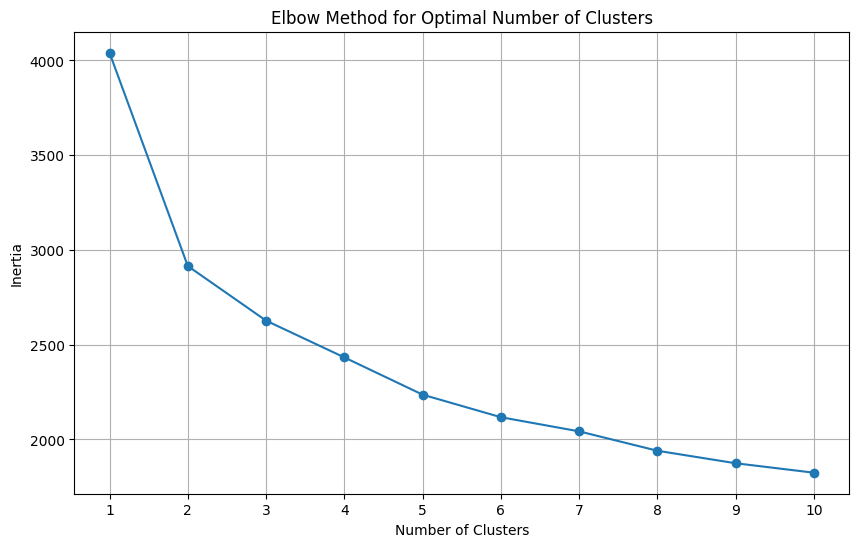

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()

In [107]:
optimal_clusters =2

In [108]:
kmeans = KMeans(n_clusters=4, random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data)

In [109]:
segmentation_data

,Credit amount,Duration,Saving accounts_No Account,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_No Account,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,-0.745131,-1.236478,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,2
1,0.949817,2.248194,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,0
2,-0.416562,-0.738668,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,3
3,1.634247,1.750384,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,0
4,0.566664,0.256953,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.544162,-0.738668,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,3
996,0.207612,0.754763,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1
997,-0.874503,-0.738668,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,3
998,-0.505528,1.999289,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,1


In [110]:
cluster_means = segmentation_data.groupby('Cluster').mean()
cluster_means

,Credit amount,Duration,Saving accounts_No Account,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_No Account,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Cluster,,,,,,,,,,,,,,,,,,,
0,2.250323,1.712389,0.299065,0.523364,0.121495,0.037383,0.018692,0.345794,0.242991,0.411215,0.000000,0.168224,0.467290,0.000000,0.074766,0.074766,0.140187,0.009346,0.065421
1,0.377877,0.776457,0.224771,0.559633,0.128440,0.050459,0.036697,0.353211,0.201835,0.380734,0.064220,0.169725,0.302752,0.009174,0.036697,0.197248,0.252294,0.027523,0.004587
2,-0.419702,-0.400693,0.098039,0.789216,0.053922,0.034314,0.024510,0.000000,1.000000,0.000000,0.000000,0.029412,0.387255,0.019608,0.044118,0.259804,0.230392,0.014706,0.014706
3,-0.504336,-0.574845,0.174098,0.560510,0.108280,0.087049,0.070064,0.594480,0.000000,0.301486,0.104034,0.076433,0.301486,0.012739,0.072187,0.163482,0.346072,0.025478,0.002123


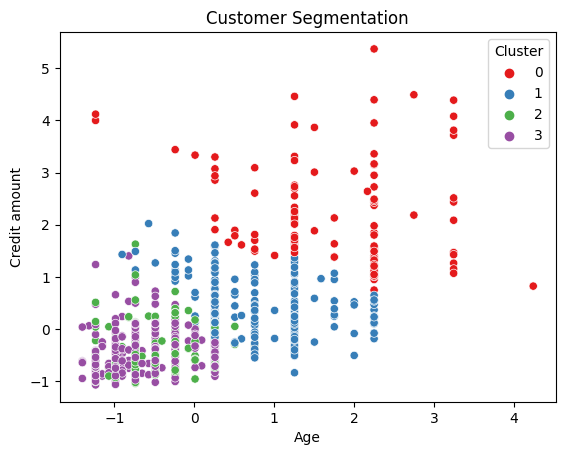

In [112]:
sns.scatterplot(data=segmentation_data, x='Duration', y='Credit amount', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.show()

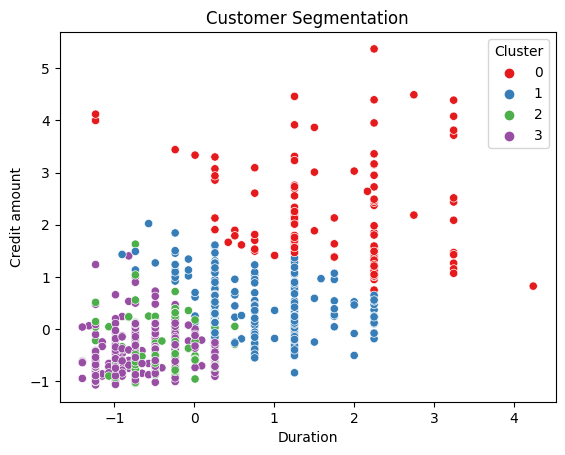

In [113]:
sns.scatterplot(data=segmentation_data, x='Duration', y='Credit amount', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()

In [94]:
def prepare_input_data(age, sex, job, housing, saving_accounts, checking_account, credit_amount, duration, purpose):
    input_data = pd.DataFrame([[age, sex, job, housing, saving_accounts, checking_account, credit_amount, duration, purpose]],
                              columns=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose'])

    input_data = pd.get_dummies(input_data)

    for col in segmentation_data.columns.drop('Cluster'):
        if col not in input_data.columns:
            input_data[col] = 0
    
    input_data = input_data[segmentation_data.columns.drop('Cluster')]

    input_data[['Age', 'Credit amount', 'Duration']] = scaler.transform(input_data[['Age', 'Credit amount', 'Duration']])
    
    return input_data

input_data = prepare_input_data(23, 'female', 4, 'own', 'rich', 'little', 48000, 24, 'car')
input_cluster = kmeans.predict(input_data)
print("Assigned Cluster:", input_cluster[0])

Assigned Cluster: 2


In [96]:
cluster_profiles = segmentation_data.groupby('Cluster').mean()

In [97]:
cluster_profiles

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.673198,-0.401342,-0.340270,1.000000,0.000000,0.040541,0.175676,0.716216,0.067568,0.018018,...,0.256757,0.054054,0.058559,0.301802,0.027027,0.076577,0.270270,0.252252,0.013514,0.000000
1,1.471695,-0.342802,-0.415968,0.235577,0.764423,0.033654,0.298077,0.548077,0.120192,0.173077,...,0.158654,0.086538,0.052885,0.375000,0.009615,0.072115,0.129808,0.307692,0.043269,0.009615
2,-0.016318,1.670952,1.564188,0.226744,0.773256,0.011628,0.075581,0.563953,0.348837,0.244186,...,0.372093,0.023256,0.174419,0.430233,0.005814,0.058140,0.104651,0.180233,0.005814,0.040698
3,-0.386573,-0.319103,-0.268791,0.000000,1.000000,0.010050,0.216080,0.653266,0.120603,0.065327,...,0.288945,0.072864,0.108040,0.296482,0.007538,0.042714,0.190955,0.324121,0.022613,0.007538


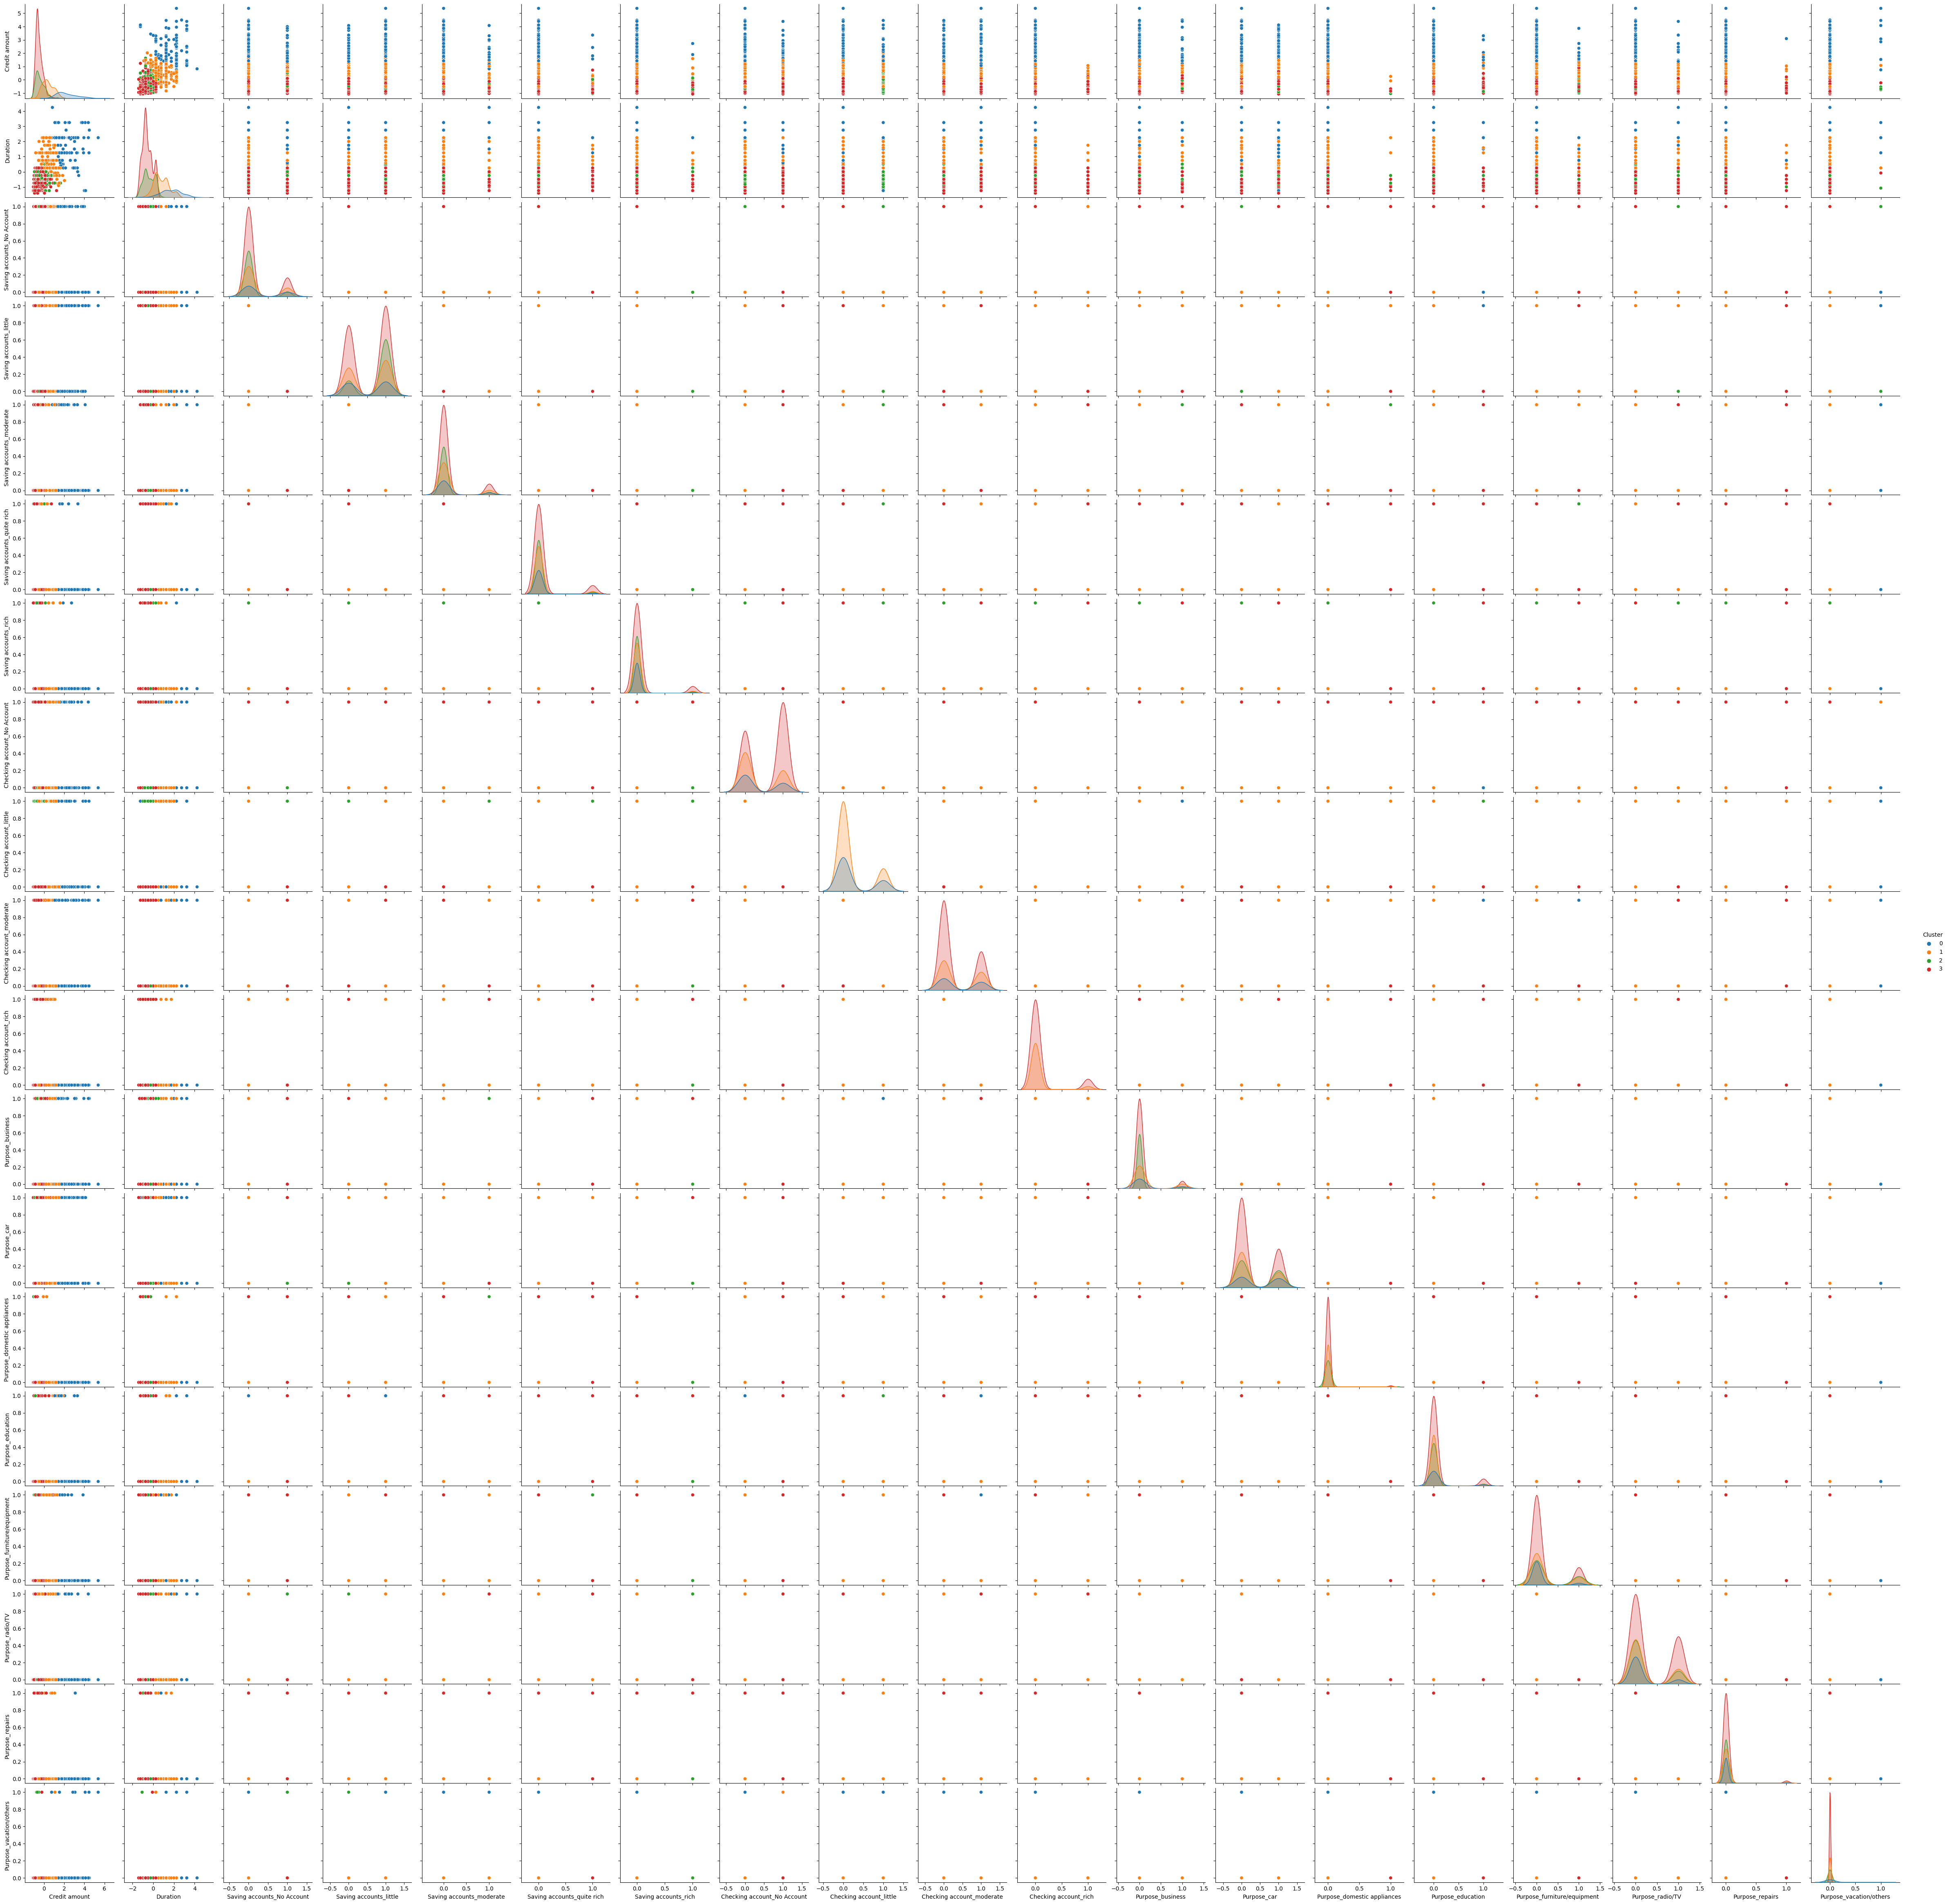

In [114]:
import seaborn as sns

sns.pairplot(segmentation_data, hue='Cluster', palette='tab10')
plt.show()